# Dataset Used
### heart disease prediction
<a href='https://www.kaggle.com/datasets/puneet6060/intel-image-classification' >Download from here</a>

# Downloading Dataset

In [46]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/puneet6060/intel-image-classification')

Skipping, found downloaded files in ".\intel-image-classification" (use force=True to force download)


# Importing required library

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Loading data

In [48]:
TRAIN_DATA_DIR = 'intel-image-classification/seg_train/seg_train'
TEST_DATA_DIR = 'intel-image-classification/seg_test/seg_test'

In [49]:
TRAINING_DATA = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIR,
    image_size=(150,150),
    batch_size=32
)
VALIDATION_DATA = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_DIR,
    image_size=(150,150),
    batch_size=32
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [50]:
classes = TRAINING_DATA.class_names
print(classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


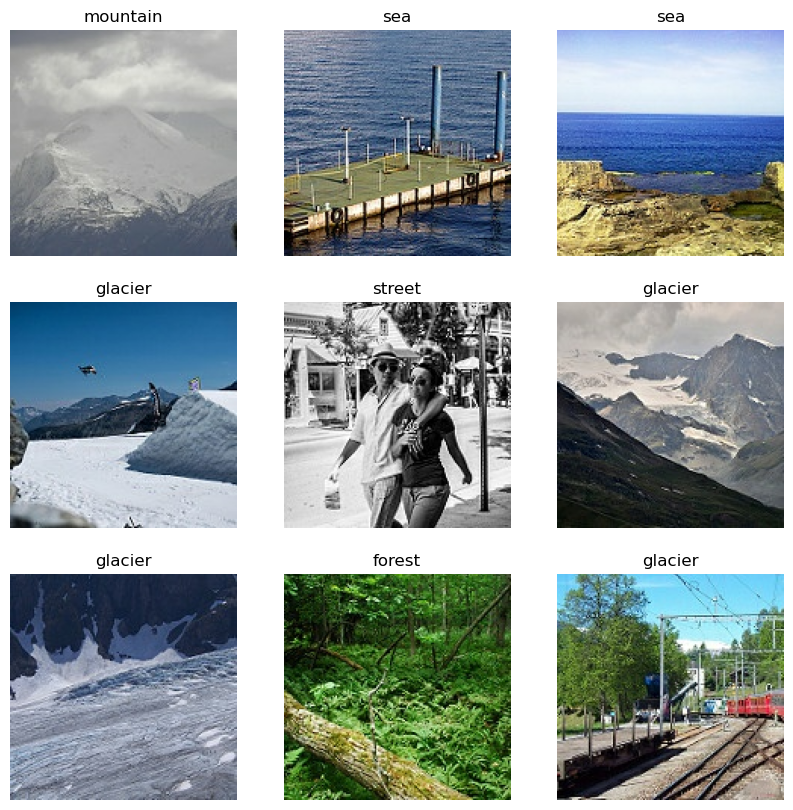

In [51]:
plt.figure(figsize=(10, 10))
for images, labels in TRAINING_DATA.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [52]:
for image_batch, labels_batch in TRAINING_DATA:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [53]:
# normalizeing_layer = tf.keras.layers.Rescaling(1./255)


In [54]:
# normalised_data = TRAINING_DATA.map(lambda x,y:(normalizeing_layer(x),y))

# Model

In [55]:
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [56]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [57]:
history = model.fit(
        TRAINING_DATA,
        validation_data=VALIDATION_DATA,
        epochs=10
      )

   

Epoch 1/10
439/439 [==============================] - 40s 90ms/step - loss: 0.9869 - accuracy: 0.6187 - val_loss: 0.7613 - val_accuracy: 0.7193
Epoch 2/10
439/439 [==============================] - 38s 87ms/step - loss: 0.6618 - accuracy: 0.7597 - val_loss: 0.6001 - val_accuracy: 0.7913
Epoch 3/10
439/439 [==============================] - 38s 87ms/step - loss: 0.5063 - accuracy: 0.8211 - val_loss: 0.5718 - val_accuracy: 0.7917
Epoch 4/10
439/439 [==============================] - 39s 89ms/step - loss: 0.3961 - accuracy: 0.8595 - val_loss: 0.5603 - val_accuracy: 0.8083
Epoch 5/10
439/439 [==============================] - 40s 91ms/step - loss: 0.2947 - accuracy: 0.8966 - val_loss: 0.6440 - val_accuracy: 0.7907
Epoch 6/10
439/439 [==============================] - 41s 92ms/step - loss: 0.2187 - accuracy: 0.9242 - val_loss: 0.7000 - val_accuracy: 0.7943
Epoch 7/10
439/439 [==============================] - 40s 92ms/step - loss: 0.1602 - accuracy: 0.9465 - val_loss: 0.8051 - val_accuracy:

In [58]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


# tkinter GUI

In [61]:
from tkinter import *


from PIL import ImageTk, Image
from tkinter.filedialog import askopenfilename
from tensorflow.keras.preprocessing import image
import numpy as np
from keras.models import load_model




root = Tk()
root.geometry('200x250')
title = Label(root,text='GUI')
title.pack()
iframe = Frame(root)
iframe.pack()

def main():
    model = load_model('model')
    classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    file = askopenfilename(filetypes=[('image','*.jpg')])
    img_show = ImageTk.PhotoImage(Image.open(file))

    for w in iframe.winfo_children():
        w.destroy()

    btn_img = Label(iframe,image=img_show)
    btn_img.image=img_show
    btn_img.pack()

    img_path = file
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    lbl = Label(iframe,text=classes[np.argmax(model.predict(img_batch))])
    lbl.pack()
    

btn = Button(root, text='select_image',bd=1,command=main)
btn.pack()

root.mainloop()


1/1 [==============================] - 0s 83ms/step
